# OCDS Intro Track Tutorial

## Tutorial Learning Goals

Welcome to the NCSCO OCDS Intro track tutorial. We are  [Nick Gawron](https://www.linkedin.com/in/ngawrondata/) and [Livia Popa](https://www.linkedin.com/in/livia-popa-23a018183/), we will be working with you through today's tutorial.  We will be using R studio for today's session. 

We will be tackling these objectives:

- *Define* open data and reproducible science
- *Describe* how to navigate important aspects of the R/RStudio user-interface
- *Recall* how to extract public data from a web portal (Cardinal) and import it into a  data software (R/RStudio)
- *Demonstrate* understanding of dataset and statistical software through exploratory data analysis plots and numerical summaries

### Meet Mr. Wuf!

Mr. Wuf works for Mount Mitchell State Park in Burnsville, NC and was recently asked by his boss to write a report summarizing rainfall and temperature data for 2021. This report will be used to help optimize 2022 event planning (e.g., fall color viewing) for park visitors and maintenance scheduling for park staff. Mr. Wuf’s wife, Mrs. Wuf, recently told him about the State Climate Office of North Carolina’s new Cardinal and Station Scout data portals. He agrees with her that it would be a great opportunity to check out these new, free tools. After some preliminary sleuthing around Station Scout, he discovered there was a National Weather Service Cooperative Observer Program (COOP; https://www.weather.gov/rah/coop) station on park property (station # 315923). How did he miss this? Once he downloads these data from Cardinal, Mr. Wuf plans to put the skills he learned in an online R programming course to the test for this real-world, work-related project.\


![Mr. Wuf](images/leafWetness.jpg)

## Open Data Science

### What is Open Data and Reproducible Science?

- Without looking at the section below, how would you define open data?

- How would you define reproducible (and open) science?

Open data documents and shares research data openly for re-use.

Open data research aims to transform research by pushing change in the way that research is carried out and disseminated by digital tools. Open data should be:

- Publicly available: Open data is freely available on the internet.
- Reusable: Proper licensing is essential for research outputs so that users know any limitations on re-use
- Transparent: With appropriate metadata to explain how research output was produced and what it contains
- You can easily share what you did with your colleagues, collaborators, etc. and it’s easy to make changes and rerun analysis with different settings.


We note that reproducible science is when an authors such as Mr. Wuf would be able to provide all the necessary data and the R code to run their analysis again, re-creating the results. 

When we combine these idea together - we get the goals for this tutorial. 

For more information go to this [handbook](https://the-turing-way.netlify.app/reproducible-research/reproducible-research.html) on the subject. 

## R Basics 

### What are libraries?


- Part of the reason `R` has become so popular is the vast array of packages available at the cran and bioconductor repositories. 

- In the last few years, the number of packages has grown exponentially!

- Helpful tools to do data analysis. 

- Lets Install One: 

Use this code for the first time
`install.packages("ggplot2")`

- Once we have this package installed, all we need to do in the future on our machine is call it
  - This is done with the `library` command
  - So at the start of your script you should: `library(ggplot2)`

In [1]:
## Now we can set up the environment for this tutorial by loading required libraries

library(ggplot2) ## this library is for making plots
library(tidyverse) ## this library is for cleaning and processing data
library(lubridate) ## this library is for handling date and time of the data
library(readxl) 
# for advancded pretty plot
library(viridis)     ## color palette
library(ggridges)    ## ridges
library(hrbrthemes)  ## plot theme

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: viridisLite

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



### Data Types

- Date: this data type is assigned to dates such as 2022-03-02 for March 2, 2022
- Character: `"a"`, `"NC State"`
- Numeric (real or decimal): `2`, `13.6`
- Integer: `2L` (the `L` tells R to store this as an integer)
- Logical: `TRUE`, `FALSE`
- Complex: `1+4i`(complex numbers with real and imaginary parts)

### Using data Inspection Functions / functions in General 

- A function is helper code that will take an input and give an output

- One useful pair of functions we can use are:  `getwd()` and `setwd()`
  -`getwd()` is a command that tells you the current file location, and where R will save  project files you create. 
  -`setwd()` is a function that will let you input a file directory, in quoted string, inside the parenthesis 
 


- `str` is a powerful function that allows you to determine what kind of variable we are working with
- `length` is a function that tells you how long objects are Examples:

In [4]:
sum(2,2)

[1] 4

In [5]:
str(2)

 num 2


In [6]:
str("two")

 chr "two"


In [7]:
wuf <- c(1,2,3)
str(wuf)

 num [1:3] 1 2 3


In [8]:
length(wuf)

[1] 3

In [11]:
## examine the dataset iris come with R
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [12]:
## check the structure of dataset iris
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [13]:
length(iris)

[1] 5

###  Importing From Cardinal

- Cardinal is a high-powered, user-oriented, one-stop-shop for North Carolina weather and climate data housed at the North Carolina State Climate Office. 

- Cardinal makes weather and climate data more accessible to users, with features and prompts that take the guesswork out of station and parameter identification and selection.

- This is a great resource for Mr.Wuf!

- We can implement code to import our external data that is already included in this repository (see the panel on the left).
  - The file name is _"raw_cardinal_Data.xlsx"_.

In [14]:
raw_cardinal_data <- read_excel("raw_cardinal_data.xlsx", 
                                col_types = c("text", "numeric", "numeric", 
                                "numeric", "numeric", "numeric", 
                                "numeric", "numeric"))

### Cleaning Data 

- The data in real world are usually a lot more messy.  
- R can handle a lot of small details to help the analysis easy and straightforward.


In [15]:
# drop rows of missing values 
cardinal<-drop_na(raw_cardinal_data)

#determine data types of all cols 
str(raw_cardinal_data)

#changes col names
colnames(cardinal)=c("date","MaxT_degF","AvgT_degF","MinT_degF","cool_degDays","grow_degDays","heat_degDays","TPrep_in")

#create a date 
cardinal$date<-as.Date(cardinal$date)

str(cardinal)

tibble [1,097 × 8] (S3: tbl_df/tbl/data.frame)
 $ Date                                                    : chr [1:1097] "2019-01-01" "2019-01-02" "2019-01-03" "2019-01-04" ...
 $ Maximum Air Temperature (F)                             : num [1:1097] 48 44 46 44 44 33 47 41 43 22 ...
 $ Mid-Range Air Temperature (F)                           : num [1:1097] 42 40 39.5 40 33.5 28 39.5 37 29 14 ...
 $ Minimum Air Temperature (F)                             : num [1:1097] 36 36 33 36 23 23 32 33 15 6 ...
 $ Accumulated Cooling Degree Days - Base 65F (Degree Days): num [1:1097] 0 0 0 0 0 0 0 0 0 0 ...
 $ Accumulated Growing Degree Days - Base 50F (Degree Days): num [1:1097] 0 0 0 0 0 0 0 0 0 0 ...
 $ Accumulated Heating Degree Days - Base 65F (Degree Days): num [1:1097] 23 25 25.5 25 31.5 ...
 $ Total Precipitation (in)                                : num [1:1097] 0.3 0.03 0.63 0.34 1 0 0 0 0 0 ...
tibble [1,097 × 8] (S3: tbl_df/tbl/data.frame)
 $ date        : Date[1:1097], format: "2019-

## Making New Data

### When does it rain ? 

In [24]:
## Can we make new data to determine when it rains based on the data?
cardinal$IfRain<- (cardinal$TPrep_in>0)
cardinal$IfRain<-as.factor(as.integer(cardinal$IfRain))
head(cardinal, 10)

date,MaxT_degF,AvgT_degF,MinT_degF,cool_degDays,grow_degDays,heat_degDays,TPrep_in,IfRain,month,TDiff_degF
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
2019-01-01,48,42.0,36,0,0,22.99,0.30,1,1,12
2019-01-02,44,40.0,36,0,0,25.01,0.03,1,1,8
2019-01-03,46,39.5,33,0,0,25.49,0.63,1,1,13
2019-01-04,44,40.0,36,0,0,25.01,0.34,1,1,8
2019-01-05,44,33.5,23,0,0,31.51,1.00,1,1,21
2019-01-06,33,28.0,23,0,0,37.00,0.00,0,1,10
2019-01-07,47,39.5,32,0,0,25.49,0.00,0,1,15
2019-01-08,41,37.0,33,0,0,28.00,0.00,0,1,8
2019-01-09,43,29.0,15,0,0,36.01,0.00,0,1,28


### Month Factor variable

- Factor variable is a category or bin we can place a value in. 

In [25]:
# month variable 
cardinal$month<-month(cardinal$date)
cardinal$month<-as.factor(cardinal$month)

# str factor
str(cardinal)

tibble [1,097 × 11] (S3: tbl_df/tbl/data.frame)
 $ date        : Date[1:1097], format: "2019-01-01" "2019-01-02" ...
 $ MaxT_degF   : num [1:1097] 48 44 46 44 44 33 47 41 43 22 ...
 $ AvgT_degF   : num [1:1097] 42 40 39.5 40 33.5 28 39.5 37 29 14 ...
 $ MinT_degF   : num [1:1097] 36 36 33 36 23 23 32 33 15 6 ...
 $ cool_degDays: num [1:1097] 0 0 0 0 0 0 0 0 0 0 ...
 $ grow_degDays: num [1:1097] 0 0 0 0 0 0 0 0 0 0 ...
 $ heat_degDays: num [1:1097] 23 25 25.5 25 31.5 ...
 $ TPrep_in    : num [1:1097] 0.3 0.03 0.63 0.34 1 0 0 0 0 0 ...
 $ IfRain      : Factor w/ 2 levels "0","1": 2 2 2 2 2 1 1 1 1 1 ...
 $ month       : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TDiff_degF  : num [1:1097] 12 8 13 8 21 10 15 8 28 16 ...


###  Numerical Variable, Rain Difference

- Dollar sign + "Name of Variable"

In [26]:
cardinal$TDiff_degF <- cardinal$MaxT_degF-cardinal$MinT_degF
head(cardinal, 10)

date,MaxT_degF,AvgT_degF,MinT_degF,cool_degDays,grow_degDays,heat_degDays,TPrep_in,IfRain,month,TDiff_degF
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
2019-01-01,48,42.0,36,0,0,22.99,0.30,1,1,12
2019-01-02,44,40.0,36,0,0,25.01,0.03,1,1,8
2019-01-03,46,39.5,33,0,0,25.49,0.63,1,1,13
2019-01-04,44,40.0,36,0,0,25.01,0.34,1,1,8
2019-01-05,44,33.5,23,0,0,31.51,1.00,1,1,21
2019-01-06,33,28.0,23,0,0,37.00,0.00,0,1,10
2019-01-07,47,39.5,32,0,0,25.49,0.00,0,1,15
2019-01-08,41,37.0,33,0,0,28.00,0.00,0,1,8
2019-01-09,43,29.0,15,0,0,36.01,0.00,0,1,28


## Numerical Summaries


### What are they ?

- Help us determine basic trends in data from printouts. 

- Summary gives as a 5 number summary of numeric variables

- Basic counts of factor variables


In [27]:
summary(cardinal)

      date              MaxT_degF       AvgT_degF       MinT_degF    
 Min.   :2019-01-01   Min.   : 8.00   Min.   : 5.00   Min.   :-7.00  
 1st Qu.:2019-10-02   1st Qu.:44.00   1st Qu.:35.00   1st Qu.:26.00  
 Median :2020-07-02   Median :55.00   Median :47.00   Median :39.00  
 Mean   :2020-07-02   Mean   :53.17   Mean   :45.08   Mean   :36.99  
 3rd Qu.:2021-04-02   3rd Qu.:65.00   3rd Qu.:57.00   3rd Qu.:50.00  
 Max.   :2022-01-01   Max.   :75.00   Max.   :66.50   Max.   :58.00  
                                                                     
  cool_degDays     grow_degDays     heat_degDays      TPrep_in     IfRain 
 Min.   :0.0000   Min.   : 0.000   Min.   : 0.00   Min.   :0.000   0:597  
 1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.: 8.00   1st Qu.:0.000   1:500  
 Median :0.0000   Median : 0.000   Median :18.01   Median :0.000          
 Mean   :0.0032   Mean   : 3.349   Mean   :19.92   Mean   :0.253          
 3rd Qu.:0.0000   3rd Qu.: 7.000   3rd Qu.:29.99   3rd Qu.:0.220 

- Frequency Table to compare categorical / factor variables.
  - Several kinds!
  - Depends on the number of categorical variables present. 

In [28]:
# Frequency Table 
table(cardinal$IfRain)


  0   1 
597 500 

This table does not look very informative since not everyone knows what "0" and "1" means. So we can change it to make it easier to understand.

In [29]:
#changes level names!
levels(cardinal$IfRain)<-c("No", "Yes")
table(cardinal$IfRain)


 No Yes 
597 500 

In [30]:
# two level table
tabl2Way<-table(cardinal$month,cardinal$IfRain)

tabl2Way

    
     No Yes
  1  51  43
  2  41  44
  3  50  43
  4  56  34
  5  52  41
  6  43  47
  7  35  58
  8  35  58
  9  51  39
  10 57  36
  11 66  24
  12 60  33

## Plotting Basics  

### Base R Plotting

- Simple visual of frequency count

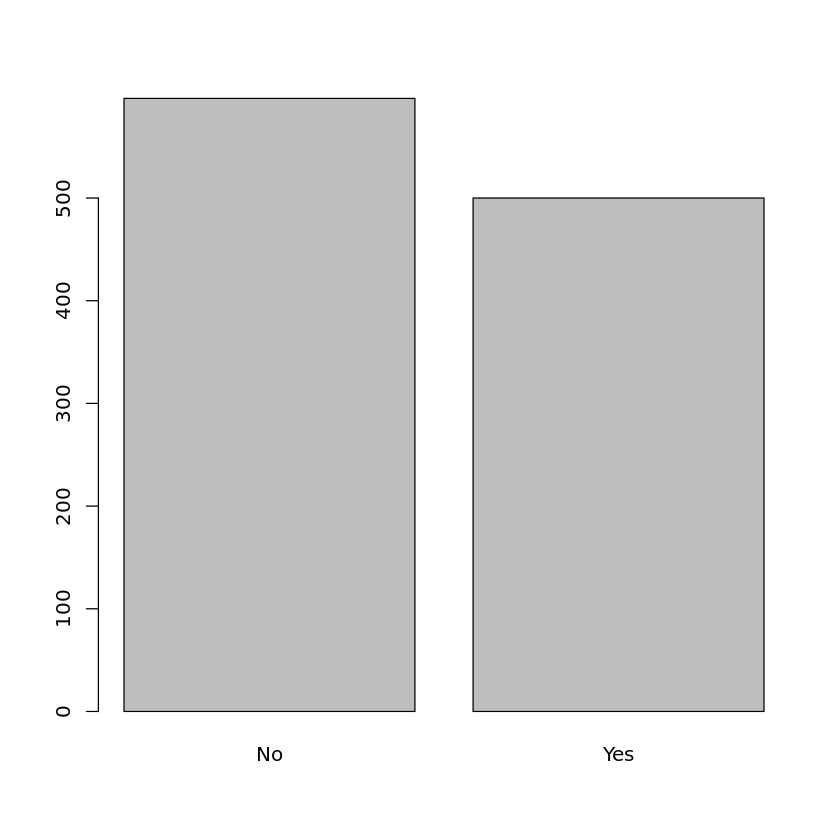

In [31]:
# base plots in R, categorical variables does a count
plot(cardinal$IfRain)

- This barplot shows the frequency of how many times it rained vs. did not rain. 
- This is for the entire dataset spanning across all years.
- In standard R, we can create a barplot with a standard table

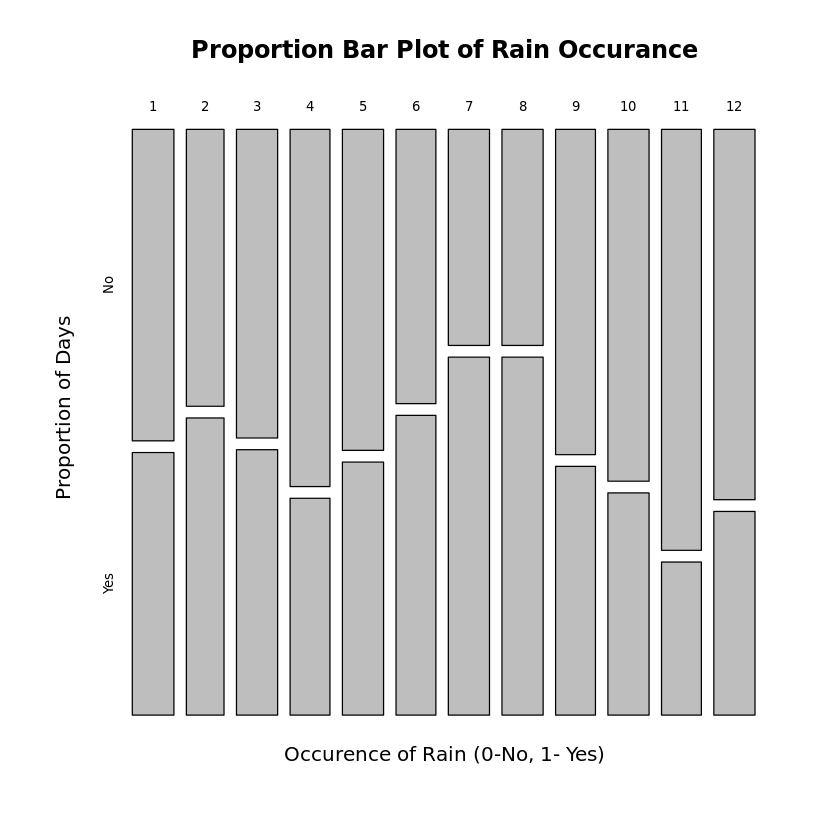

In [32]:
plot(tabl2Way,main ='Proportion Bar Plot of Rain Occurance',xlab="Occurence of Rain (0-No, 1- Yes)",ylab = "Proportion of Days")

### GGPLOT Plotting

- Base R is limited in usage. 

- We will be using a package called `ggplot2`.

- Here is a good link: https://www.rstudio.com/resources/cheatsheets/

- Two basic functions: `ggplot()` & `geom_plottype`
  - Note we have not even had a title or label specs yet 

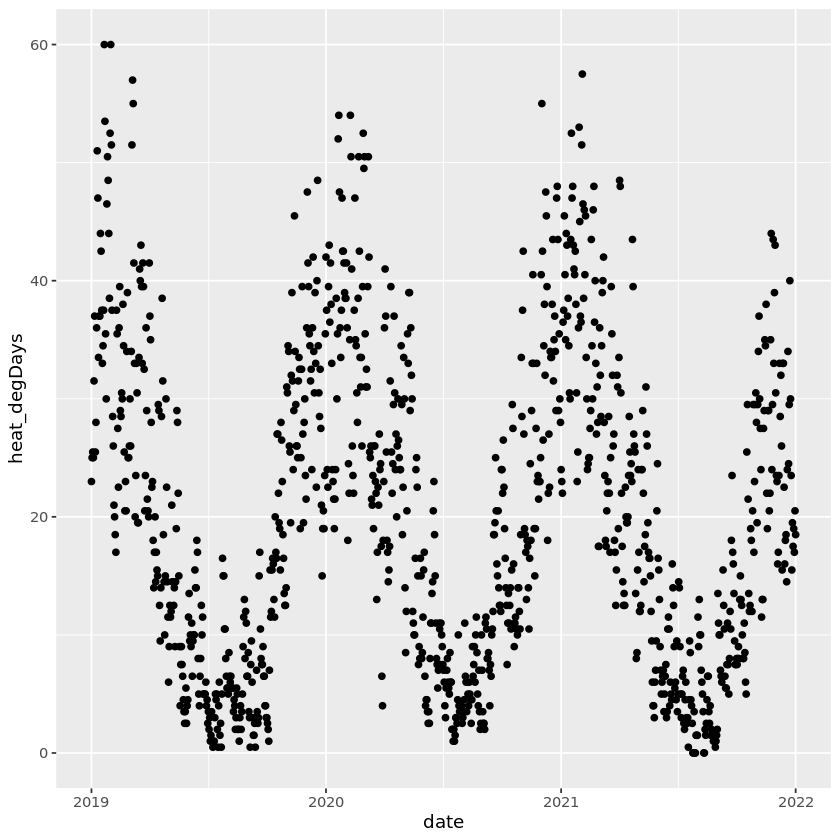

In [33]:
# first ggplot figure for time series of heat degree days
ggplot(cardinal,aes(x= date ,y= heat_degDays))+ geom_point()

- This is a scatter plot showing the distribution of Heat Accumulation Days across all years. 
- The highest point is in January of each year. 
- We observes sinusoidal nature

How could we improve this plot?

#### How Would You Modify This?

- Let's say we wanted to plot Max temperature as a scatter plot over time? How would you modify the code from the above block?

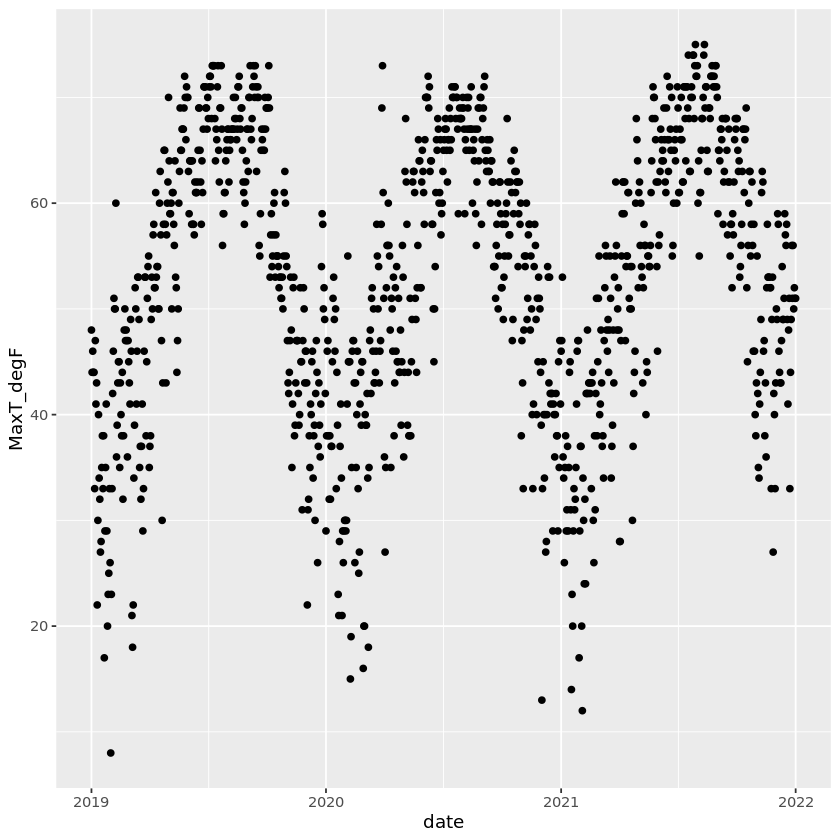

In [36]:
# second ggplot figure for time series of maximum air temperature
ggplot(cardinal,aes(x= date ,y= MaxT_degF))+ geom_point()

#### plots with *Layers* in ggplot2

- We can also observe correlation and possible trend numerical variables

- Using cheatsheet, we can find a lot more plot types and Layer Options!

  - Note the use of `labs` statement, we will use that next!

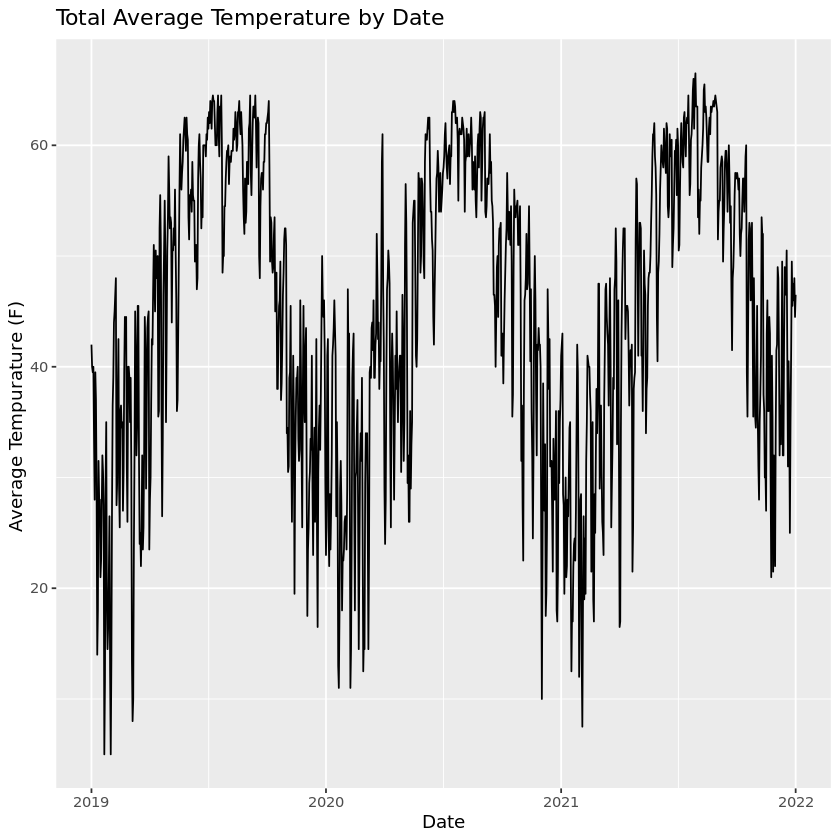

In [38]:
ggplot(cardinal,aes(x=date,y=AvgT_degF)) + 
    geom_line() + 
    labs(title="Total Average Temperature by Date",
         y="Average Tempurature (F) ", x= "Date")

- This line graph shows the total average temperature by date. Temperature generally increases in the spring and summer months, with peaks and troughs within each month.

- options are very versatile inside a `+geom_statement()`, or a *plot layer*

- We can use the cheatsheet to find out information about this 

- Note how we change atributes inside the `aes` statment

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



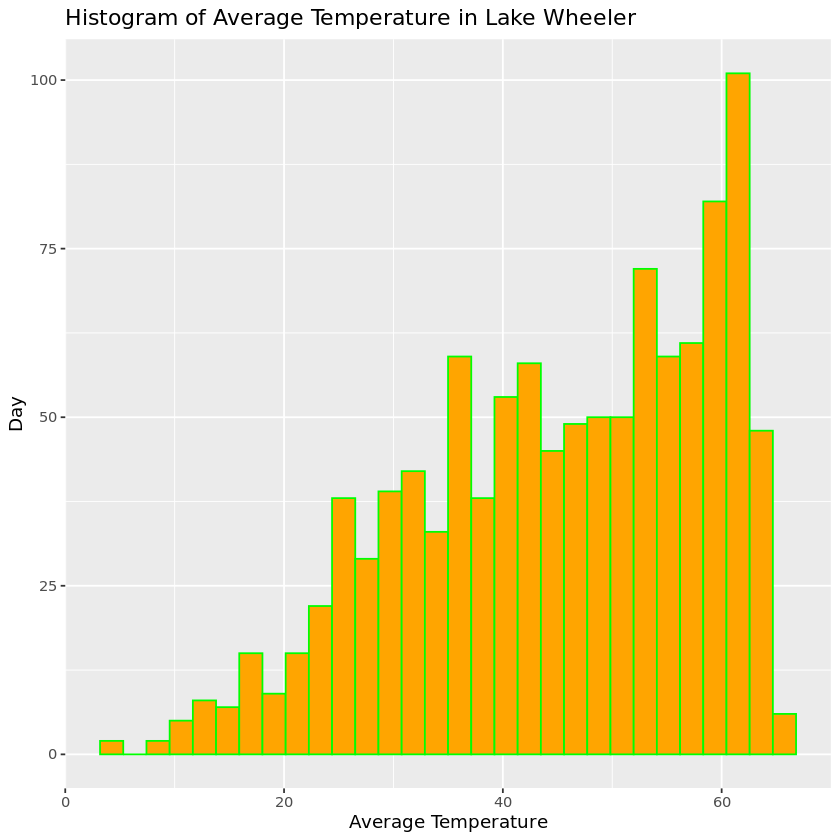

In [39]:
ggplot(cardinal,aes(x=AvgT_degF)) + 
    geom_histogram(color="green",fill="orange") + 
    labs(x="Average Temperature", y="Day",
         title ="Histogram of Average Temperature in Lake Wheeler")
# title and all labels included in one more statement 

- This histogram shows the average temperature given a count of days. 

- Statistically we see this data is pretty right skewed- something we could look into is if this is the case for all months? (We will look into this later!)

- Below is a scatter plot

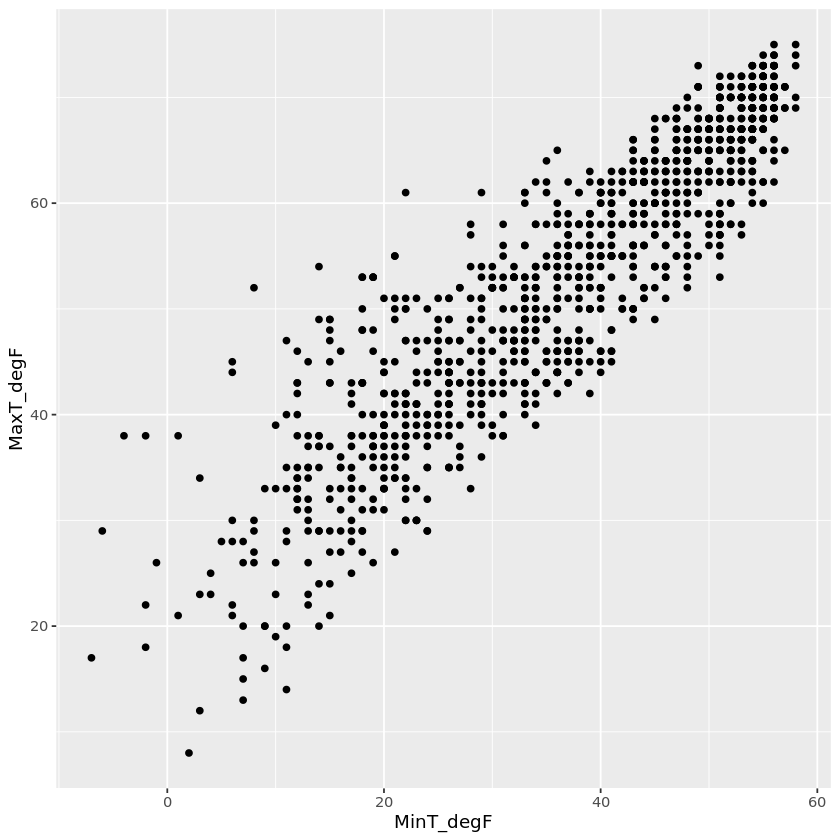

In [42]:
# general plot
TempPlot <- ggplot(cardinal,aes(x=MinT_degF,y=MaxT_degF)) + geom_point()
TempPlot

- One popular option is to color-code based off of a categorial / factor variable 

- See the difference when we include `aes(col=month)`


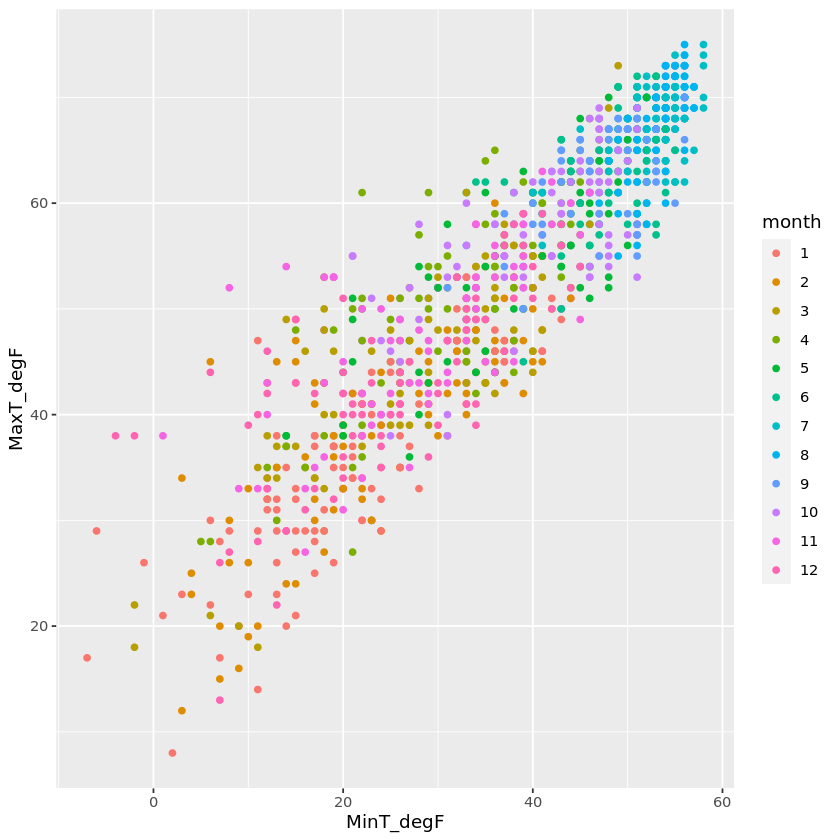

In [41]:
# coloring by month to observe trends
ggplot(cardinal,aes(x=MinT_degF,y=MaxT_degF)) + geom_point(aes(col=month))

- This scatterplot shows the  Maximum tempurature recorded in a day agasint the  minimum tempurature recorded. We note this variable is color coded by month. 

#### Categorical Variables on an Axis

- Note we can save our plots with a variable name using the `<-` symbol 

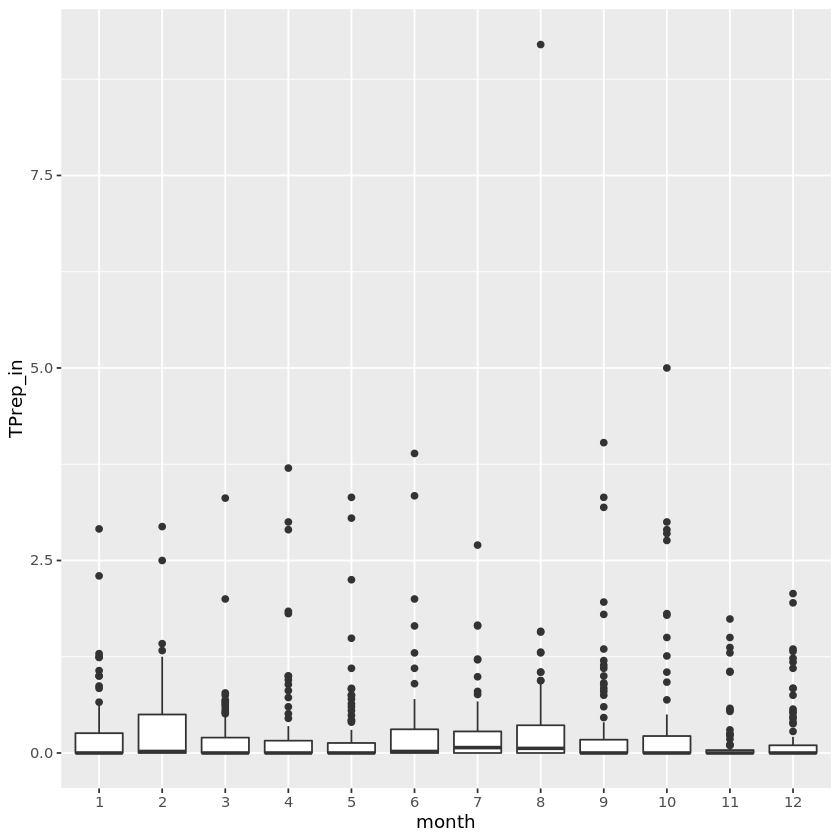

In [43]:
boxpRain<-ggplot(cardinal,aes(x=month,y=TPrep_in))+geom_boxplot()
boxpRain

- This is a boxplot of total precipitation within each month. 
- These dots indicate outliers in out data

- We can add edits, with new layers,  to a specific `ggplot2` object

Warning message:
“Removed 54 rows containing non-finite values (stat_boxplot).”


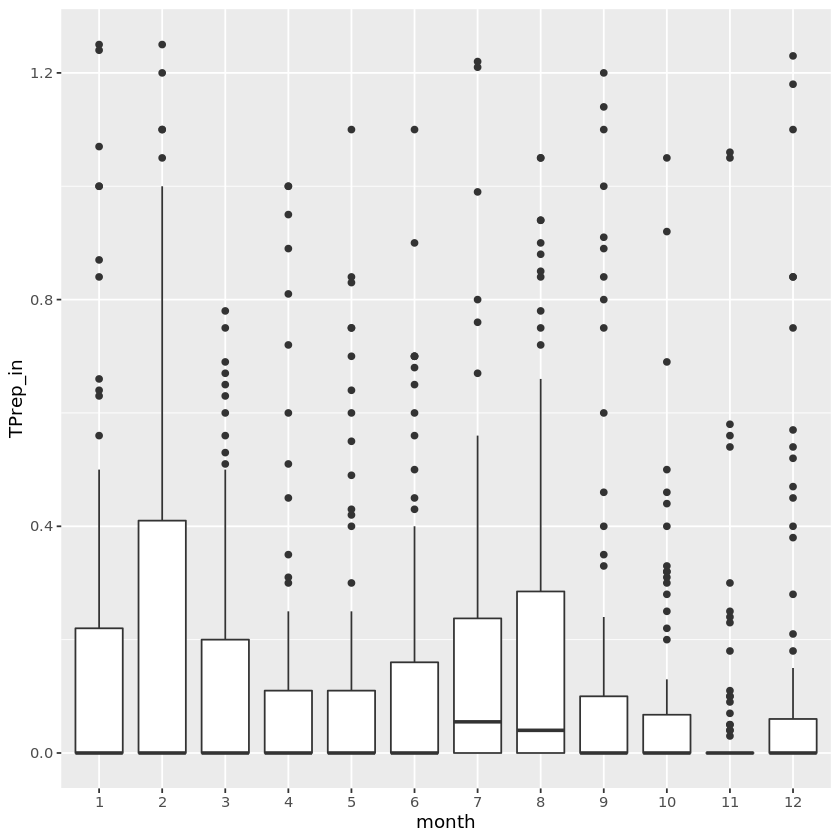

In [44]:
## we can limit the y-axis for the plot to make it better to understand details
boxpRain + ylim(0, 1.25) + labs()

- By changing the range of the boxplots we can now see the distribution of the data more easily.

- Only issue is that boxplots can be confusing


- Mr. Wuf wants a more cumulative assessment for rainfall
- We want to create a barplot with total Rain Per Month

- This will require us to go outside of the `cardinal` data set we are working with!

In [45]:
#creates a data frame for just this one bar plot!
JustMonthRainTot<-cardinal%>%group_by(month)%>%summarise(Rain = sum(TPrep_in))
str(JustMonthRainTot)

tibble [12 × 2] (S3: tbl_df/tbl/data.frame)
 $ month: Factor w/ 12 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Rain : num [1:12] 21.9 27.1 17.3 23.3 21 ...


- With the new data set we created, `JustMonthRainTot`, we can now create the barplot!


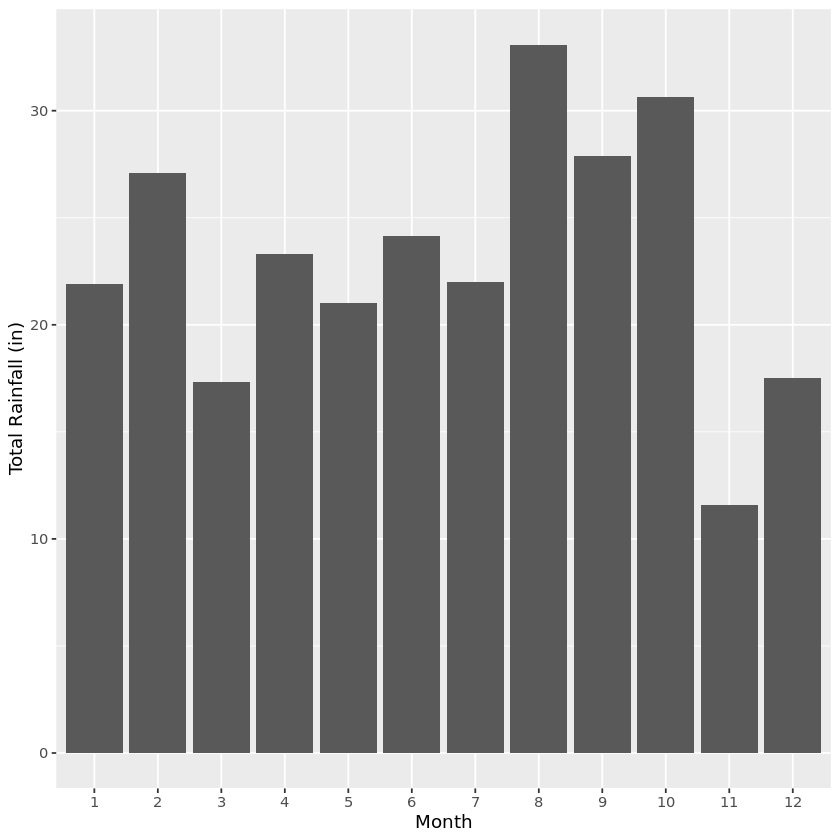

In [49]:
ggplot(JustMonthRainTot,aes(x=month,y=Rain)) + geom_col() + 
    labs(y = "Total Rainfall (in)",x = "Month")

- What do we know about Bar Plots that could help us with this? **Text Poll Link Here**

- We somehow need to change how our data is being plotted. Let's look at `?geom_col`


- Thanks to our investigation, Mr.Wuf knows he cannot use `geom_col()` stated as is for this kind of plot. 


To quickly show the power of *ggplot*, observe how we can create this plot without the tidyverse commands from a few boxed above: 

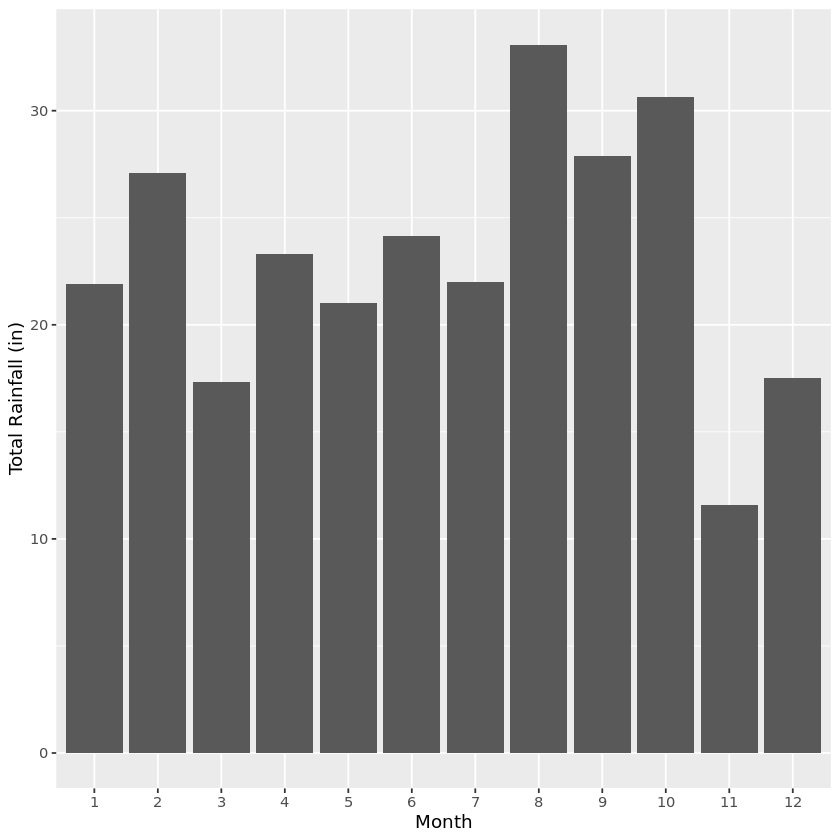

In [51]:
ggplot(cardinal, aes(x=month, y=TPrep_in)) + geom_col() + 
    labs(y = "Total Rainfall (in)",x = "Month")

We can also use categorical variables on the x-axis, if they relate to a variable in our data frame!

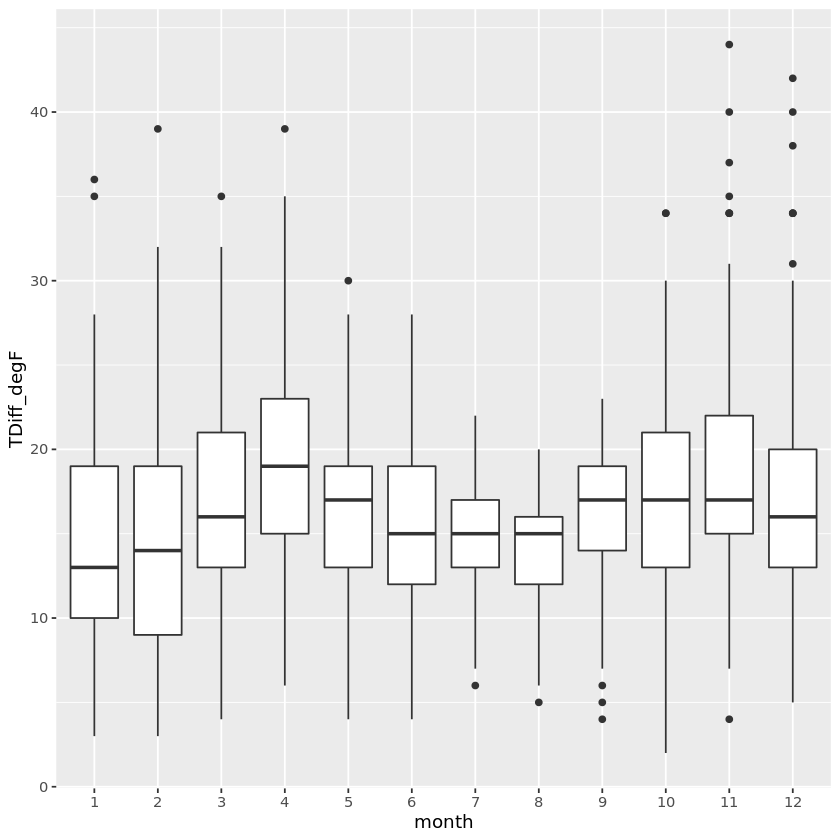

In [53]:
## geom_boxplot() is a great tool to observe spreads
ggplot(cardinal,aes(x=month , y = TDiff_degF)) + geom_boxplot()

- This boxplot shows the range of temperature across each month. In the summer the range decreases, meaning there is less variation in temperature when compared to winter months.

- Box-plots are cumbersome and not super helpful in visalization. 

- How could we improve this boxplot?

### How could we make boxplot better? 

- Note we are looking at average daily temperature

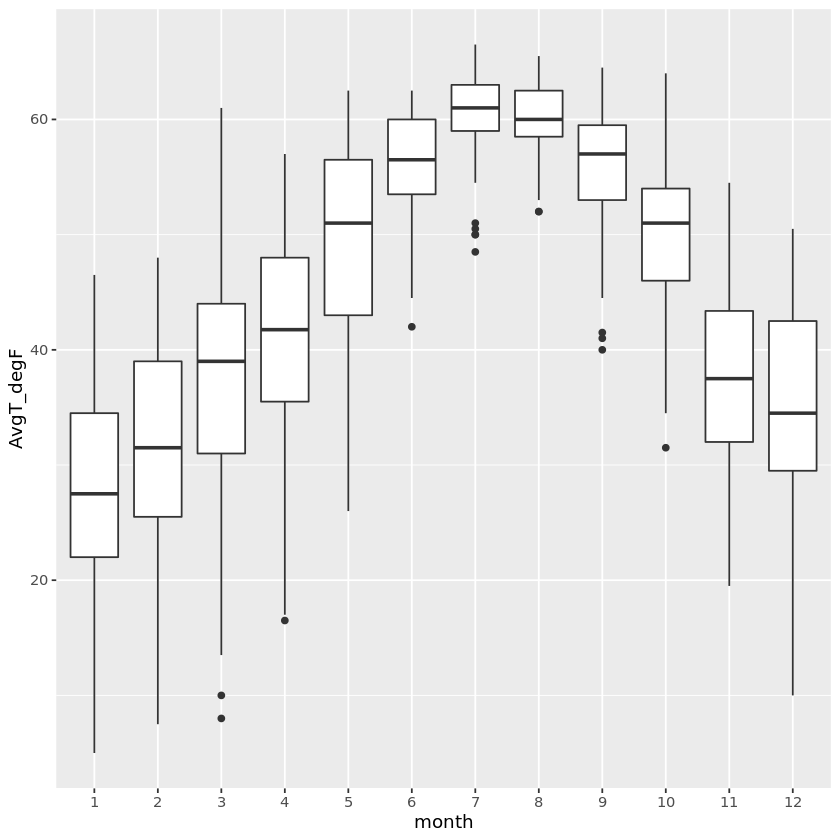

In [55]:
# + geom_boxplot is a great tool to observe spreads

tempBox<- ggplot(cardinal,aes(x=month , y = AvgT_degF))+geom_boxplot()
tempBox

We could add a title and approraite labels! 

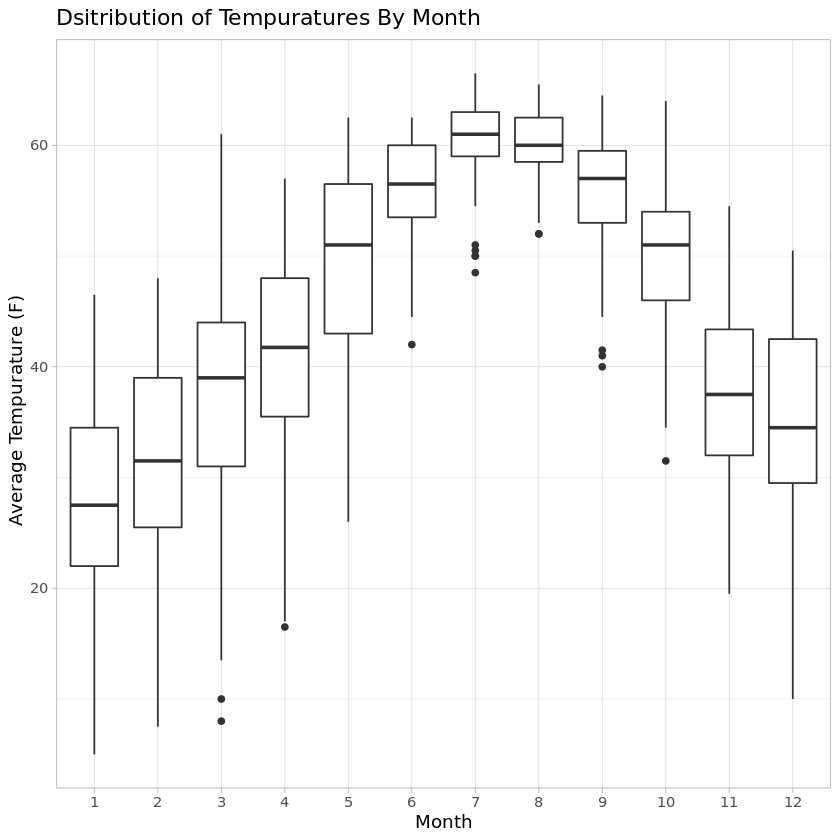

In [56]:
tempBox + labs(x="Month", y=" Average Tempurature (F)",
               title="Dsitribution of Tempuratures By Month") + theme_light()

This is a boxplot showing the spread of average temperature across months. There are a few outliers in some months and the range of values is smaller in the summer.

### Fancy Plot Time

- Inspiration from ggridges documentation

- We want to stylize the boxplot from the above statement       

- We will be using a few libraries here: remeber to use `install.packages("library_name")` first before running the library statment. 

- The below panel shows us libraries we need

In [57]:
library(viridis)     ## color palette
library(ggridges)    ## ridges
library(hrbrthemes)  ## plot theme

- we will walk you through the ggplot options for this plot!  

Picking joint bandwidth of 2.62



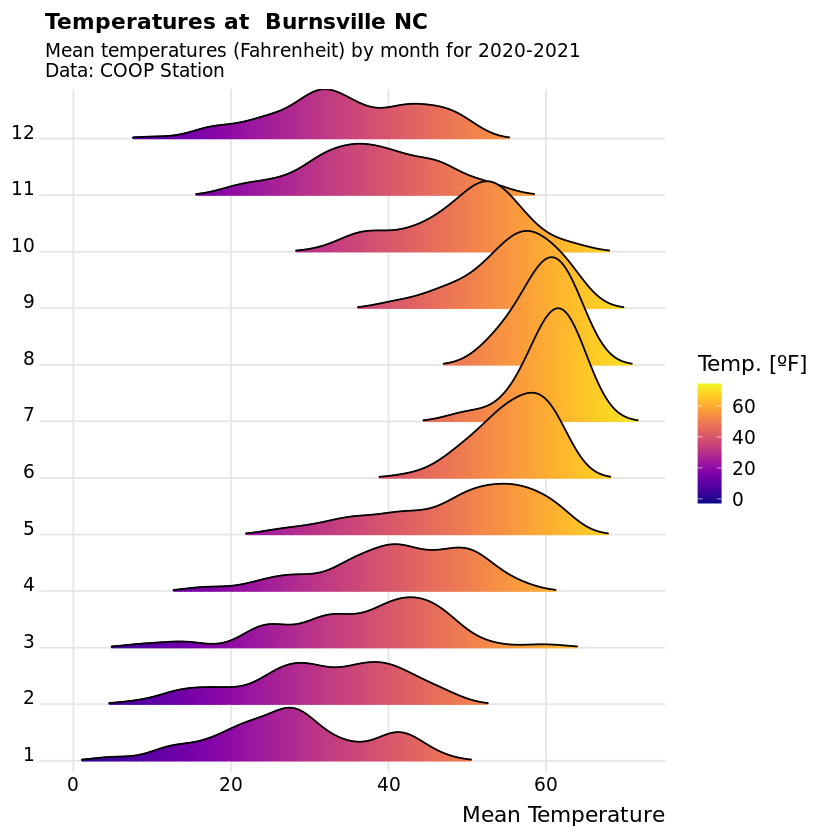

In [58]:
ggplot(cardinal, aes(x = AvgT_degF, y = month, fill = ..x..)) +
  
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.) +
  
  scale_x_continuous(expand = c(0.01, 0)) +
  
  scale_y_discrete(expand = c(0.01, 0)) +
  
  scale_fill_viridis(name = "Temp. [ºF]", option = "C") +
  
  labs(title = 'Temperatures at  Burnsville NC',
       subtitle = 'Mean temperatures (Fahrenheit) by month for 2020-2021\nData: COOP Station', 
       x = "Mean Temperature") +
  
  theme_ridges(font_size = 13, grid = TRUE) + theme(axis.title.y = element_blank())

- This plot shows the distribution of temperature within each month. 

- The density plots are colored by temperature, making it easier to visualize the spread of temperature. 

## Bonus Section

Here we are applying very similar concepts to the tutorial above - with new a new data set! Here we are using an ECOnet station in Raliegh North Carolina. The data we are using this time is called `"cardinal_data.csv"` (see the left panel to find the file).

In [59]:
cardinal_raw <- read_csv("cardinal_data.csv", 
     col_types = list(`Average Air Temperature (F)` = col_number(), 
         `Maximum Air Temperature (F)` = col_number(), 
         `Minimum Air Temperature (F)` = col_number(), 
         `Average Experimental Leaf Wetness (mV)` = col_number(), 
         `Total Precipitation (in)` = col_number(), 
         `Average Relative Humidity (%)` = col_number(), 
         `Average Soil Moisture (m3/m3)` = col_number(), 
         `Average Soil Temperature (F)` = col_number(), 
         `Average Solar Radiation (W/m2)` = col_number(), 
         `Average Station Pressure (mb)` = col_number()))

Warning message:
“One or more parsing issues, see `problems()` for details”


### Cleaning Data 

- usually a lot more messy 
- R can handle a lot of small details 

In [67]:
# drop rows of missing values 
cardinal<-drop_na(cardinal_raw)

#determine data types of all cols 
str(cardinal)

tibble [729 × 11] (S3: tbl_df/tbl/data.frame)
 $ Date                                  : chr [1:729] "1/1/20" "1/2/20" "1/3/20" "1/4/20" ...
 $ Average Air Temperature (F)           : num [1:729] 43.1 44.9 52.8 57.2 42.1 44.1 41.4 42.5 40.4 52 ...
 $ Maximum Air Temperature (F)           : num [1:729] 53.6 55.4 64.9 65.1 50.5 58.5 52 57.6 50.5 65.8 ...
 $ Minimum Air Temperature (F)           : num [1:729] 35.1 35.2 45.7 42.6 34.9 32 31.3 29.7 31.3 38.1 ...
 $ Average Experimental Leaf Wetness (mV): num [1:729] 266 274 362 373 265 ...
 $ Total Precipitation (in)              : num [1:729] 0 0.05 0.95 0.52 0 0 0.07 0 0 0 ...
 $ Average Relative Humidity (%)         : num [1:729] 63.8 72 92.1 83.5 57 ...
 $ Average Soil Moisture (m3/m3)         : num [1:729] 0.28 0.28 0.29 0.35 0.33 0.31 0.3 0.3 0.3 0.29 ...
 $ Average Soil Temperature (F)          : num [1:729] 48.6 47.6 51 54.6 48.3 46.1 44.6 43.3 43.3 46.1 ...
 $ Average Solar Radiation (W/m2)        : num [1:729] 134.8 66 31.1 44.9 1

In [68]:
#create a date 
cardinal$Date <- as.Date(cardinal$Date, tryFormats= c("%m/%d/%y"))
head(cardinal, 10)

Date,Average Air Temperature (F),Maximum Air Temperature (F),Minimum Air Temperature (F),Average Experimental Leaf Wetness (mV),Total Precipitation (in),Average Relative Humidity (%),Average Soil Moisture (m3/m3),Average Soil Temperature (F),Average Solar Radiation (W/m2),Average Station Pressure (mb)
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-01,43.1,53.6,35.1,265.60,0.00,63.79,0.28,48.6,134.78,999.13
2020-01-02,44.9,55.4,35.2,274.22,0.05,71.95,0.28,47.6,65.96,1002.54
2020-01-03,52.8,64.9,45.7,362.06,0.95,92.13,0.29,51.0,31.10,998.46
2020-01-04,57.2,65.1,42.6,373.00,0.52,83.46,0.35,54.6,44.91,993.43
2020-01-05,42.1,50.5,34.9,264.75,0.00,56.97,0.33,48.3,135.38,1004.77
2020-01-06,44.1,58.5,32.0,264.68,0.00,57.63,0.31,46.1,137.63,1004.80
2020-01-07,41.4,52.0,31.3,273.52,0.07,75.20,0.30,44.6,40.91,1002.46
2020-01-08,42.5,57.6,29.7,313.64,0.00,58.86,0.30,43.3,135.65,1010.30
2020-01-09,40.4,50.5,31.3,264.83,0.00,60.18,0.30,43.3,121.55,1022.39


In [69]:
#changes col names
colnames(cardinal)=c("date","AvgT","MaxT","MinT","AvgLw","Tprep","AvgHum","AvgSm","AvgSt","AvgSr","AvgStp")
head(cardinal, 10)

date,AvgT,MaxT,MinT,AvgLw,Tprep,AvgHum,AvgSm,AvgSt,AvgSr,AvgStp
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-01,43.1,53.6,35.1,265.60,0.00,63.79,0.28,48.6,134.78,999.13
2020-01-02,44.9,55.4,35.2,274.22,0.05,71.95,0.28,47.6,65.96,1002.54
2020-01-03,52.8,64.9,45.7,362.06,0.95,92.13,0.29,51.0,31.10,998.46
2020-01-04,57.2,65.1,42.6,373.00,0.52,83.46,0.35,54.6,44.91,993.43
2020-01-05,42.1,50.5,34.9,264.75,0.00,56.97,0.33,48.3,135.38,1004.77
2020-01-06,44.1,58.5,32.0,264.68,0.00,57.63,0.31,46.1,137.63,1004.80
2020-01-07,41.4,52.0,31.3,273.52,0.07,75.20,0.30,44.6,40.91,1002.46
2020-01-08,42.5,57.6,29.7,313.64,0.00,58.86,0.30,43.3,135.65,1010.30
2020-01-09,40.4,50.5,31.3,264.83,0.00,60.18,0.30,43.3,121.55,1022.39


### Making New Data

#### When does it Rain ? 

In [71]:
## making new data
cardinal$IfRain<- (cardinal$Tprep>0)
cardinal$IfRain<-as.factor(as.integer(cardinal$IfRain))
head(cardinal, 10)

date,AvgT,MaxT,MinT,AvgLw,Tprep,AvgHum,AvgSm,AvgSt,AvgSr,AvgStp,IfRain
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2020-01-01,43.1,53.6,35.1,265.60,0.00,63.79,0.28,48.6,134.78,999.13,0
2020-01-02,44.9,55.4,35.2,274.22,0.05,71.95,0.28,47.6,65.96,1002.54,1
2020-01-03,52.8,64.9,45.7,362.06,0.95,92.13,0.29,51.0,31.10,998.46,1
2020-01-04,57.2,65.1,42.6,373.00,0.52,83.46,0.35,54.6,44.91,993.43,1
2020-01-05,42.1,50.5,34.9,264.75,0.00,56.97,0.33,48.3,135.38,1004.77,0
2020-01-06,44.1,58.5,32.0,264.68,0.00,57.63,0.31,46.1,137.63,1004.80,0
2020-01-07,41.4,52.0,31.3,273.52,0.07,75.20,0.30,44.6,40.91,1002.46,1
2020-01-08,42.5,57.6,29.7,313.64,0.00,58.86,0.30,43.3,135.65,1010.30,0
2020-01-09,40.4,50.5,31.3,264.83,0.00,60.18,0.30,43.3,121.55,1022.39,0


### Month Factor variable

- Factor variable is a category or bin we can place a value in.

In [72]:
# month variable 
cardinal$month<-month(cardinal$date)
cardinal$month<-as.factor(cardinal$month)

# str factor
str(cardinal)

tibble [729 × 13] (S3: tbl_df/tbl/data.frame)
 $ date  : Date[1:729], format: "2020-01-01" "2020-01-02" ...
 $ AvgT  : num [1:729] 43.1 44.9 52.8 57.2 42.1 44.1 41.4 42.5 40.4 52 ...
 $ MaxT  : num [1:729] 53.6 55.4 64.9 65.1 50.5 58.5 52 57.6 50.5 65.8 ...
 $ MinT  : num [1:729] 35.1 35.2 45.7 42.6 34.9 32 31.3 29.7 31.3 38.1 ...
 $ AvgLw : num [1:729] 266 274 362 373 265 ...
 $ Tprep : num [1:729] 0 0.05 0.95 0.52 0 0 0.07 0 0 0 ...
 $ AvgHum: num [1:729] 63.8 72 92.1 83.5 57 ...
 $ AvgSm : num [1:729] 0.28 0.28 0.29 0.35 0.33 0.31 0.3 0.3 0.3 0.29 ...
 $ AvgSt : num [1:729] 48.6 47.6 51 54.6 48.3 46.1 44.6 43.3 43.3 46.1 ...
 $ AvgSr : num [1:729] 134.8 66 31.1 44.9 135.4 ...
 $ AvgStp: num [1:729] 999 1003 998 993 1005 ...
 $ IfRain: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 2 1 1 1 ...
 $ month : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...


###  Numerical Variable, Rain Difference

- Dollar sign + "Name of Variable"

In [74]:
cardinal$TDiff <- cardinal$MaxT-cardinal$MinT

### Numerical Summaries

Let's check the summary of the data set

In [75]:
summary(cardinal)

      date                 AvgT            MaxT            MinT      
 Min.   :2020-01-01   Min.   :29.20   Min.   :34.20   Min.   :21.20  
 1st Qu.:2020-07-03   1st Qu.:50.40   1st Qu.:60.80   1st Qu.:39.40  
 Median :2021-01-01   Median :62.30   Median :72.90   Median :52.90  
 Mean   :2020-12-31   Mean   :61.43   Mean   :71.61   Mean   :52.14  
 3rd Qu.:2021-07-03   3rd Qu.:73.80   3rd Qu.:84.20   3rd Qu.:66.20  
 Max.   :2022-01-01   Max.   :84.10   Max.   :95.00   Max.   :76.30  
                                                                     
     AvgLw           Tprep            AvgHum          AvgSm       
 Min.   :260.4   Min.   :0.0000   Min.   :26.36   Min.   :0.1300  
 1st Qu.:270.0   1st Qu.:0.0000   1st Qu.:62.10   1st Qu.:0.2700  
 Median :287.7   Median :0.0000   Median :71.95   Median :0.3000  
 Mean   :306.0   Mean   :0.1586   Mean   :69.93   Mean   :0.2975  
 3rd Qu.:322.7   3rd Qu.:0.0700   3rd Qu.:79.80   3rd Qu.:0.3300  
 Max.   :603.4   Max.   :4.3500   Max.

Frequency Table to compare categorical / factor variables.

In [76]:
# Frequency Table 
table(cardinal$month,cardinal$IfRain)

    
      0  1
  1  34 29
  2  27 30
  3  39 23
  4  43 17
  5  37 23
  6  38 22
  7  35 26
  8  38 24
  9  38 22
  10 40 22
  11 39 21
  12 41 21

### Plotting Basics  


- Simple visual of frequency count

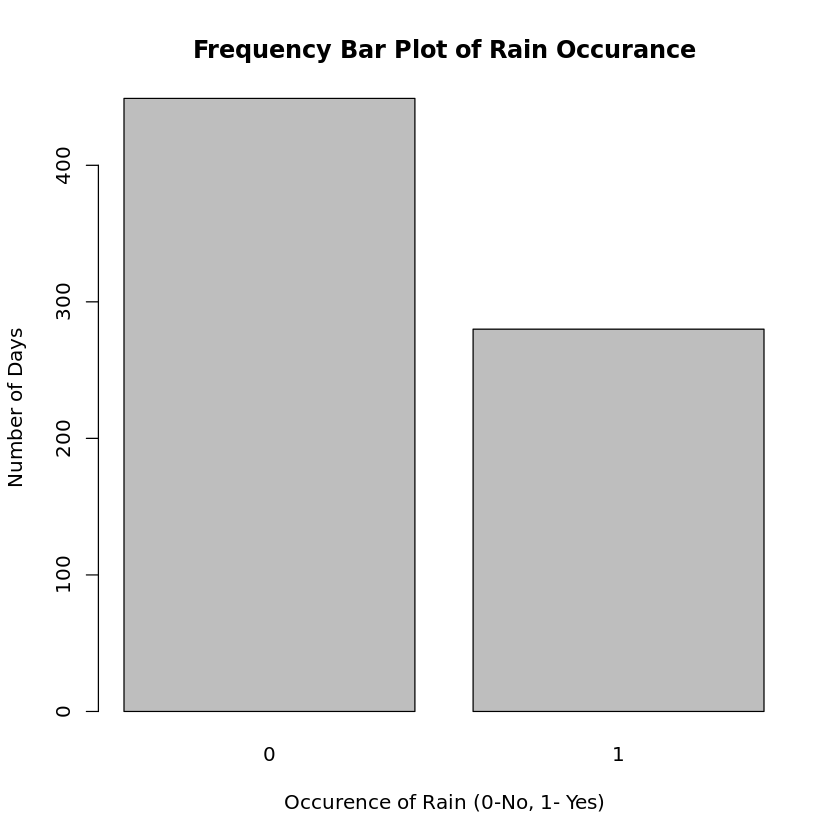

In [77]:
# base plots in R, categorical variables
#does a count
plot(cardinal$IfRain,main ='Frequency Bar Plot of Rain Occurance',xlab="Occurence of Rain (0-No, 1- Yes)",ylab = "Number of Days")

- We will be using a package called `ggplot2`.

- Here is a good link: https://www.rstudio.com/resources/cheatsheets/

- Two basic functions: ggplot() & geom_plottype
  - Note we have not even had a title or label specs yet 

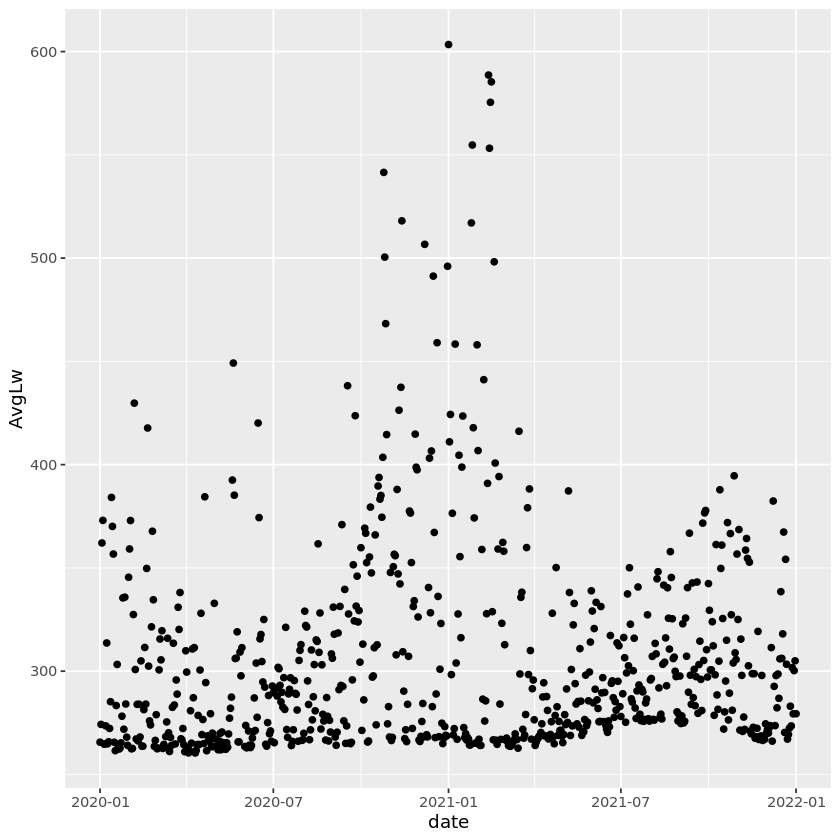

In [78]:
# first ggplot figure

ggplot(cardinal,aes(x= date ,y= AvgLw))+ geom_point()

- Maybe show total precip vs month as bar chart.

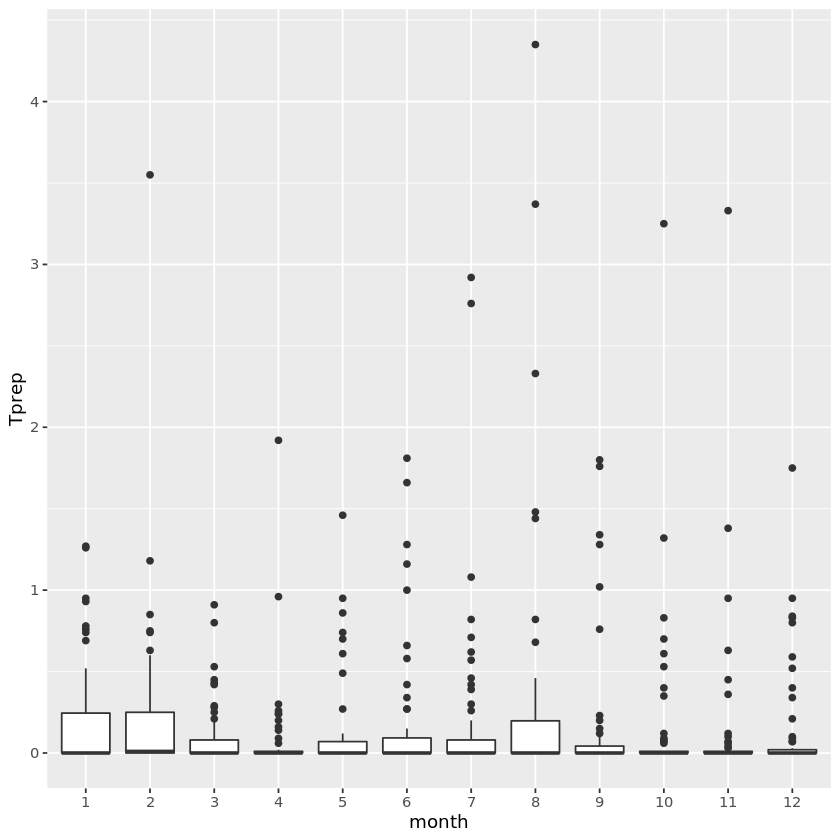

In [80]:
boxpRain<-ggplot(cardinal,aes(x=month,y=Tprep))+geom_boxplot()
boxpRain

These dots indicate outliers in out data- we can make this plot easier to visualize manually

Warning message:
“Removed 48 rows containing non-finite values (stat_boxplot).”


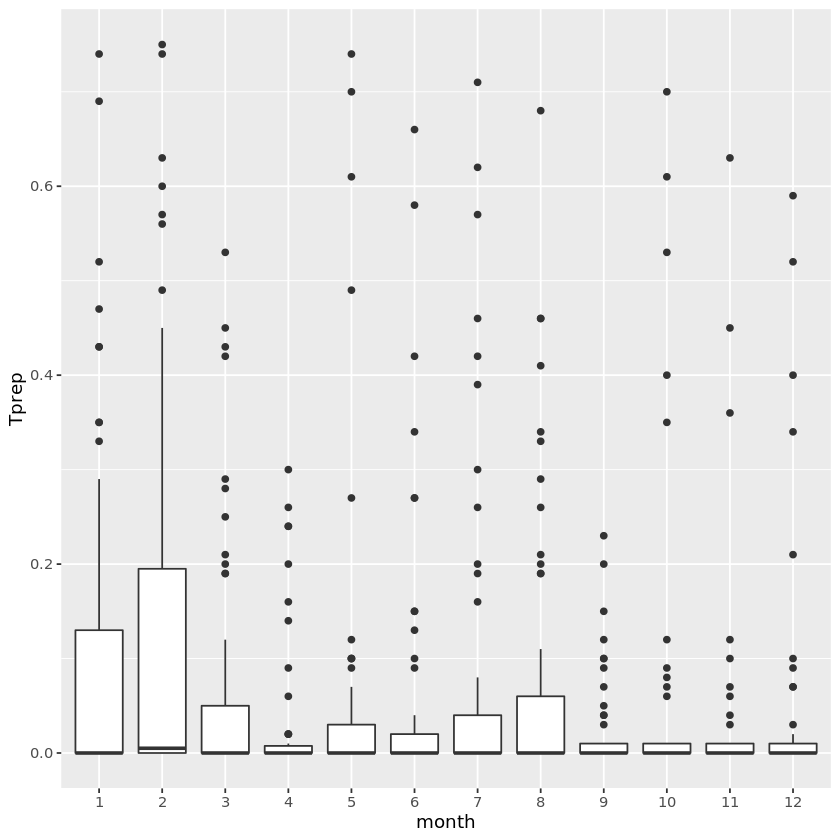

In [81]:
boxpRain+ylim(0, .75)

- Observe correlation and possible trend numerical variables

- Using cheatsheet, we can find a lot more plot types and options!

  - Note the use of `labs` statement

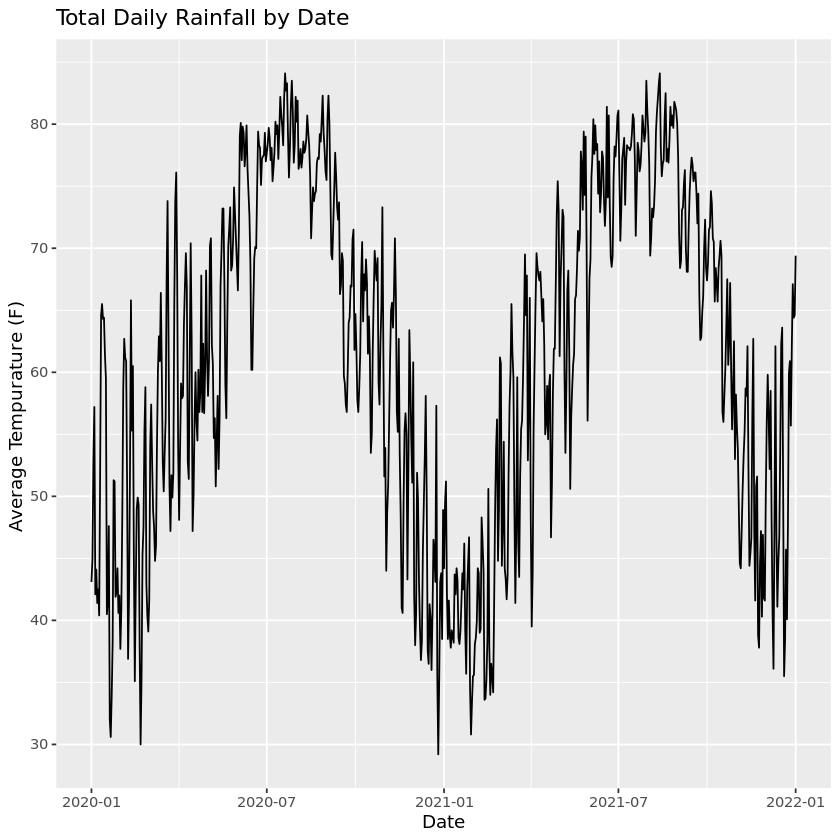

In [83]:
ggplot(cardinal,aes(x=date,y=AvgT)) + geom_line() + 
    labs(title="Total Daily Rainfall by Date",
         y="Average Tempurature (F) ", x= "Date")


- options are very versatile inside a `+geom_statement()`

- We can use the cheatsheet to find out information about this 

- Note how we change atributes inside the `aes` statment

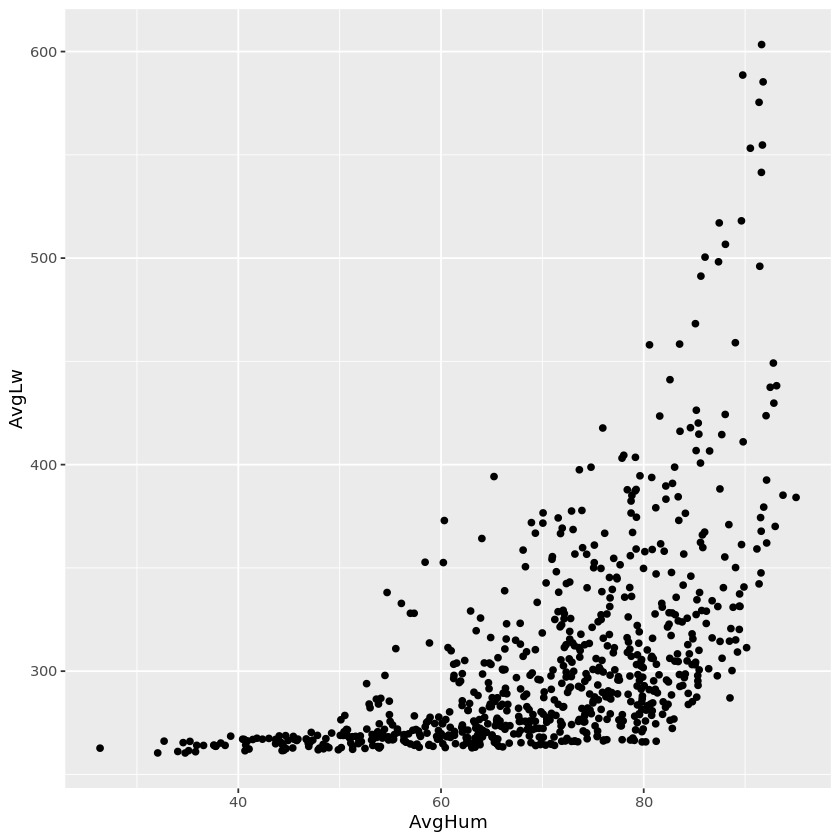

In [86]:
# general plot
ggplot(cardinal,aes(x=AvgHum,y=AvgLw))+geom_point()

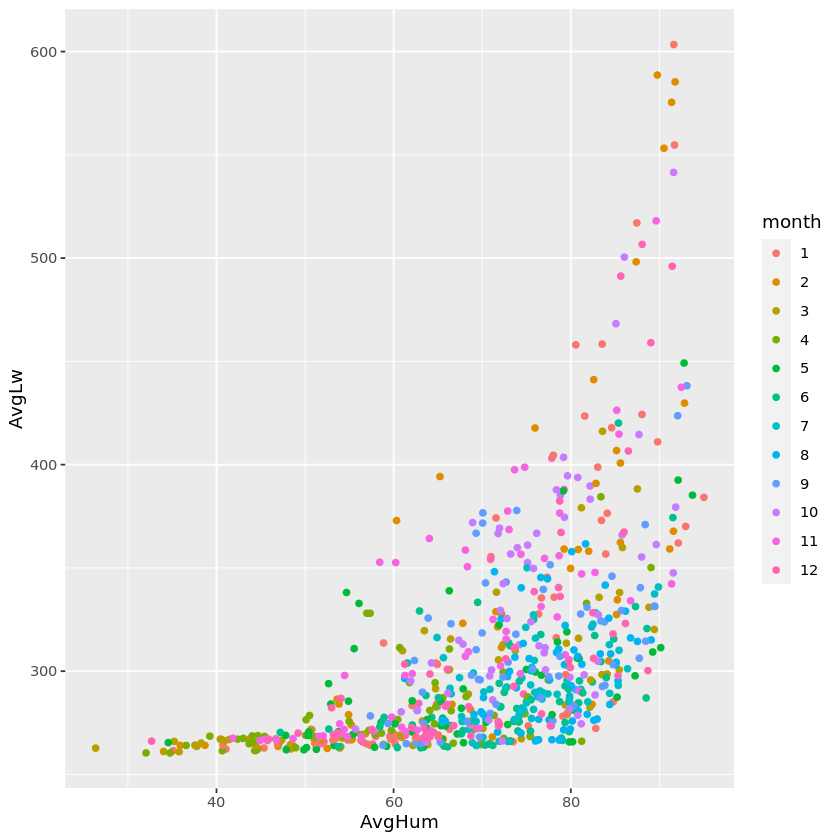

In [85]:
# coloring by month to observe trends
ggplot(cardinal,aes(x=AvgHum,y=AvgLw))+geom_point(aes(col=month))

We can also use categorical variables on the x-axis


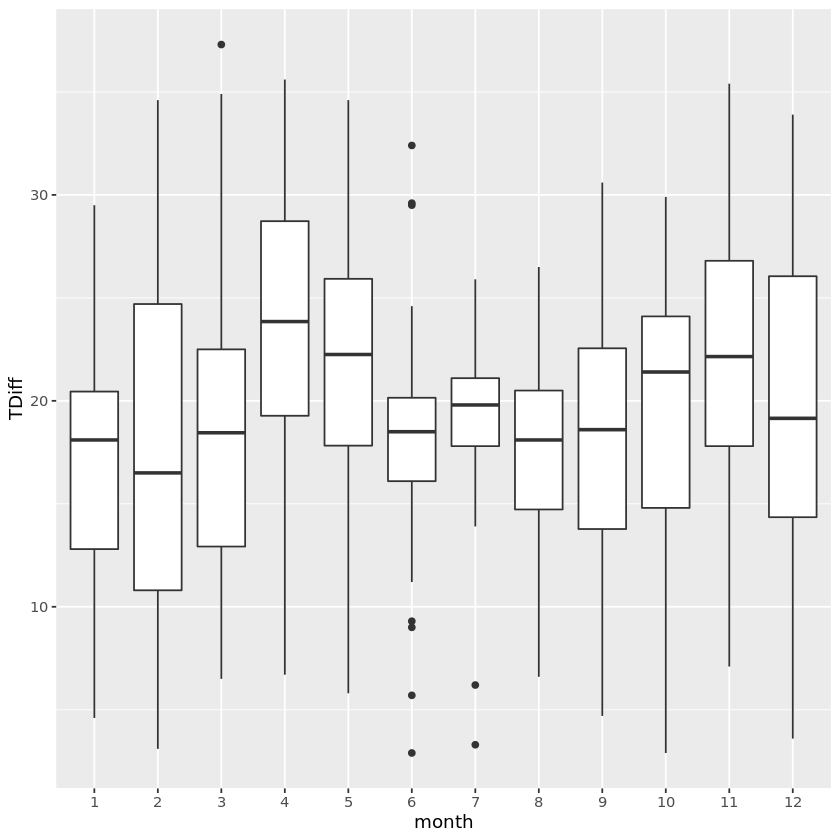

In [87]:
# + geom_boxplot is a great tool to observe spreads

ggplot(cardinal,aes(x=month , y = TDiff))+geom_boxplot()

Box-plots are cumbersome and not super helpful in visalization.

### How could we make this boxplot better? 

- Note we are looking at average daily tempurature

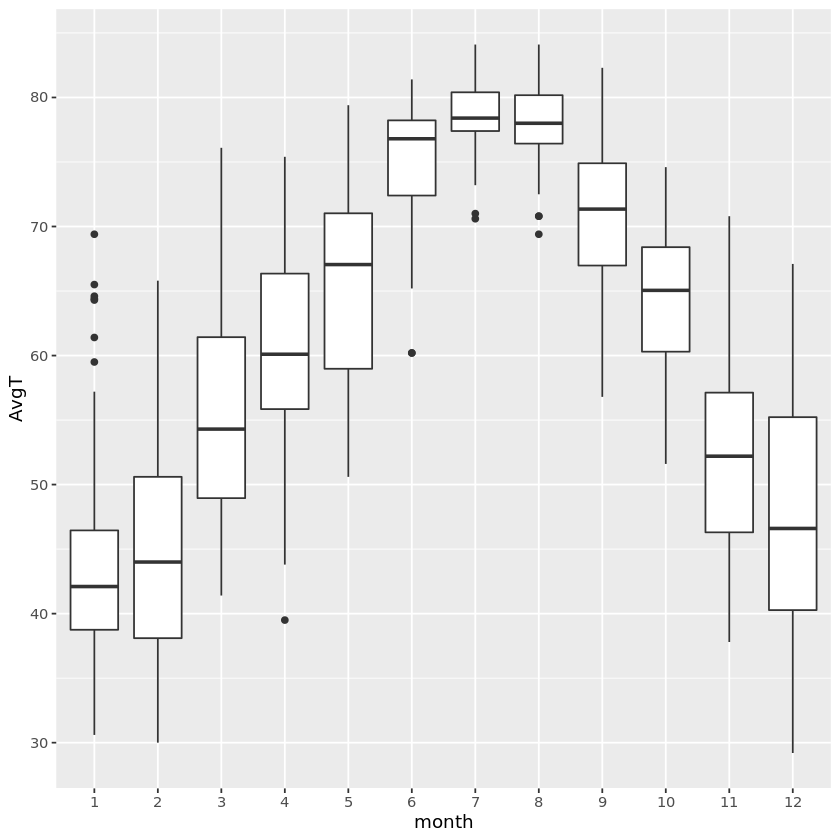

In [88]:
# + geom_boxplot is a great tool to observe spreads

ggplot(cardinal,aes(x=month , y = AvgT))+geom_boxplot()

### Extra Bonus Plot Time


- Inspiration from ggridges documentation

- We want to stylize the boxplot from the above statement       

- We will be using a few libraries here: remember to use `install.packages("library_name")` first before running the library statment. 

- we will walk you through the ggplot options for this plot! 


Picking joint bandwidth of 2.54



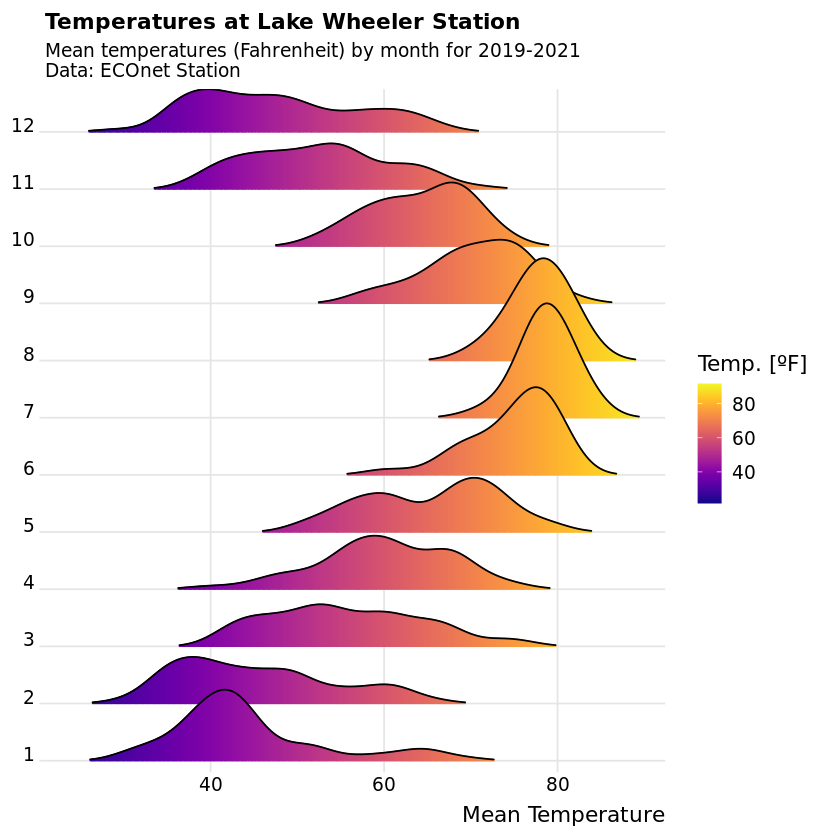

In [89]:
ggplot(cardinal, aes(x = AvgT, y = month, fill = ..x..)) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.) +
  scale_x_continuous(expand = c(0.01, 0)) +
  scale_y_discrete(expand = c(0.01, 0)) +
  scale_fill_viridis(name = "Temp. [ºF]", option = "C") +
  labs(title = 'Temperatures at Lake Wheeler Station',
       subtitle = 'Mean temperatures (Fahrenheit) by month for 2019-2021\nData: ECOnet Station', 
       x = "Mean Temperature") +
  theme_ridges(font_size = 13, grid = TRUE) + theme(axis.title.y = element_blank())

## Closing & Resources

- *Define* open data and reproducible science
- *Describe* how to navigate important aspects of the R/RStudio user-interface
- *Recall* how to extract public data from a web portal (Cardinal) and import it into a  data software (R/RStudio)
- *Demonstrate* understanding of dataset and statistical software through exploratory data analysis plots and numerical summaries

### Resouces

- For a A Hydrologists Guide to Open Science, from the HESS Journal, click [here](https://hess.copernicus.org/articles/26/647/2022/). 